In [ ]:
# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:

# Load the dataset into a pandas DataFrame

In [38]:
df = pd.read_csv("Online Retail.csv") 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [39]:
# Get information about the DataFrame, including data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
# Calculate and print some basic statistics about the dataset

In [41]:
print("Number of transactions", df["InvoiceNo"].nunique())
print("Number of products", df["StockCode"].nunique())    
print("Number of customers", df["CustomerID"].nunique())
print("Number of countries", df["Country"].nunique())
print("Number of missing customers",round((df["CustomerID"].isnull().sum()/len(df))*100,2),"%")

Number of transactions 25900
Number of products 4070
Number of customers 4372
Number of countries 38
Number of missing customers 24.93 %


In [42]:
# Remove duplicate rows from the DataFrame

In [37]:
print(df[df.duplicated(keep=False)])
df_no_duplicates = df.drop_duplicates(keep='first')
# Check for any remaining duplicate rows
df_no_duplicates[df_no_duplicates.duplicated(keep=False)]
df=df_no_duplicates

       InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

             InvoiceDate  UnitPrice  CustomerID         Country  
485     01-12-2010 11:45       4.95     17908

In [9]:
df[(df['Description'].isnull())&(df['CustomerID'].isnull())&(df['UnitPrice']==0)&(df['Quantity']<=0)] # Identify rows with missing or invalid data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,01-12-2010 16:50,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,02-12-2010 14:42,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,03-12-2010 15:30,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,03-12-2010 15:30,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,03-12-2010 15:30,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
517719,580087,84341B,NaN,-2,01-12-2011 14:27,0.0,NaN,United Kingdom
521333,580359,20775,NaN,-35,02-12-2011 16:11,0.0,NaN,United Kingdom
522160,580379,72225C,NaN,-144,02-12-2011 17:57,0.0,NaN,United Kingdom
522162,580381,21758,NaN,-9,02-12-2011 17:58,0.0,NaN,United Kingdom


In [33]:
# Fill missing values in the 'Description' column using forward and backward fill
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
# Replace 0 values in the 'UnitPrice' column with the maximum value for the corresponding 'StockCode'
df['UnitPrice'] = df.groupby('StockCode')['UnitPrice'].transform(lambda x: x.replace(0, x.max()))

C:\Users\ANIKET THAKUR\AppData\Local\Temp\ipykernel_25064\3753431970.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
C:\Users\ANIKET THAKUR\AppData\Local\Temp\ipykernel_25064\3753431970.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [36]:
df[(df['Description'].isna())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,01-12-2010 14:35,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,27-07-2011 14:10,0.0,NaN,United Kingdom
281615,561555,37477B,NaN,-11,28-07-2011 10:21,0.0,NaN,United Kingdom
281616,561557,37477C,NaN,-31,28-07-2011 10:21,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,19-09-2011 11:01,0.0,NaN,United Kingdom


<Axes: xlabel='Country'>

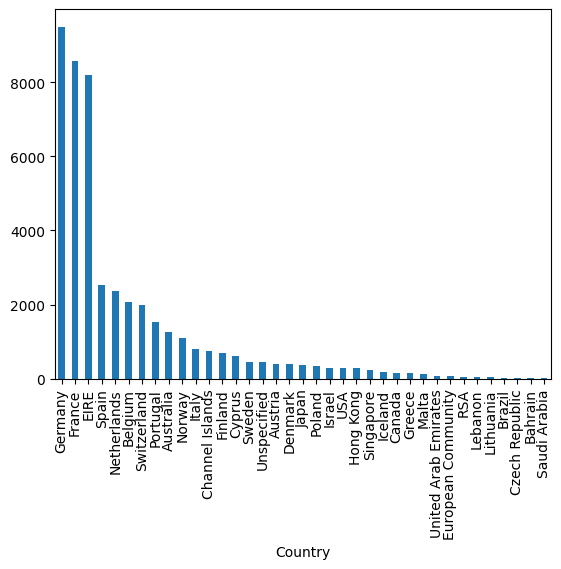

In [44]:
# Filter the DataFrame for transactions outside the United Kingdom because due to high frequency of UK graph was not visible 
df1=df[df['Country']!='United Kingdom']
# Plot the number of transactions per country
df1['Country'].value_counts().plot(kind='bar')

In [114]:
# Count the number of transactions per country
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [115]:
# Count the number of transactions per customer
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

<Axes: xlabel='CustomerID'>

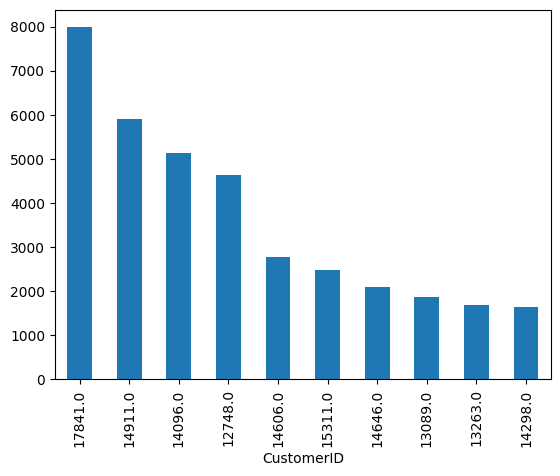

In [116]:
# Plot the number of transactions for the top 10 customers
df['CustomerID'].value_counts().head(10).plot(kind='bar')

In [118]:
order_cancelled = df[df["InvoiceNo"].astype(str).str.contains("C")]
order_cancelled.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom


In [119]:
print("Total no. of cancelled orders is:", len(order_cancelled))
total_orders = df["InvoiceNo"].nunique()
print("Percentage of Order cancelled is:", round((len(order_cancelled)*100)/total_orders,2),"%")

Total no. of cancelled orders is: 9288
Percentage of Order cancelled is: 35.86 %


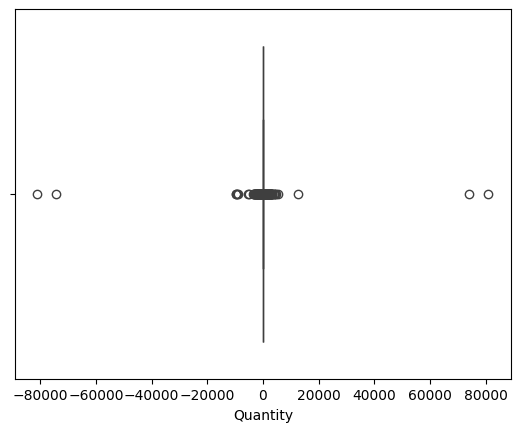

Lower Bound: -12.5
Upper Bound: 23.5
Outliers:
       InvoiceNo StockCode                         Description  Quantity  \
9         536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
26        536370     22728           ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727           ALARM CLOCK BAKELIKE RED         24   
30        536370     21883                    STARS GIFT TAPE         24   
31        536370     10002         INFLATABLE POLITICAL GLOBE         48   
...          ...       ...                                 ...       ...   
541876    581585     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        24   
541882    581585     21916     SET 12 RETRO WHITE CHALK STICKS        24   
541883    581585     84692         BOX OF 24 COCKTAIL PARASOLS        25   
541891    581586     23275    SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217       RED RETROSPOT ROUND CAKE TINS        24   

             InvoiceDate  UnitPrice  Cus

In [122]:
sns.boxplot(x=df["Quantity"])
plt.show()

Q1= df["Quantity"].quantile(0.25)
Q3 = df["Quantity"].quantile(0.75)
IQR = Q3 - Q1
lower_bound  = Q1-1.5*IQR
upper_bound  = Q3+1.5*IQR
outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Outliers:\n{outliers}")

In [123]:
temp_df = df.groupby(["InvoiceNo","CustomerID"], as_index=False)["InvoiceDate"].count()
transaction_df=temp_df.rename(columns={"InvoiceDate" : "Number Of Products"})
transaction_df.head(10)

,InvoiceNo,CustomerID,Number Of Products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1
5,536370,12583.0,20
6,536371,13748.0,1
7,536372,17850.0,2
8,536373,17850.0,16
9,536374,15100.0,1


In [125]:
from scipy import stats

# Calculate the Z-scores for the 'Quantity' column
z_score = stats.zscore(df["Quantity"])

# Define the threshold for outliers (typically 3 or -3)
threshold = 3

# Outliers are the rows where the absolute value of z_score is greater than the threshold
outliers = df[(z_score > threshold) | (z_score < -threshold)]
outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,02-12-2010 14:23,0.03,15838.0,United Kingdom
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,02-12-2010 16:48,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,02-12-2010 17:38,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,02-12-2010 17:38,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,03-12-2010 11:48,0.16,14156.0,EIRE
...,...,...,...,...,...,...,...,...
540061,581457,23543,WALL ART KEEP CALM,698,08-12-2011 18:43,4.15,18102.0,United Kingdom
540070,581458,22197,POPCORN HOLDER,1500,08-12-2011 18:45,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,08-12-2011 18:46,0.72,17949.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom


In [117]:
# Calculate and print some basic statistics about the dataset (again)
print("Number of transactions", df["InvoiceNo"].nunique())
print("Number of products", df["StockCode"].nunique())    
print("Number of customers", df["CustomerID"].nunique())
print("Number of countries", df["Country"].nunique())
print("Number of missing customers",round((df["CustomerID"].isnull().sum()/len(df))*100,2),"%")

Number of transactions 25900
Number of products 4070
Number of customers 4372
Number of countries 38
Number of missing customers 24.93 %
